**PIYUSH CHAUHAN B.TECH CSE 3RD YEAR**

# Objective: To implement and demonstrate K-Nearest Neighbors (KNN) clustering for grouping similar types of flowers using the Iris dataset. We will also visualize the clusters and evaluate model performance using silhouette scores.

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

# Explore the dataset (EDA - Exploratory Data Analysis).

**Load the Iris dataset.**

In [2]:
# Load the dataset
iris_df = pd.read_csv('/kaggle/input/iris-dataset/IRIS.csv')

# Display first few rows

In [3]:
# Display first few rows of the dataset
print(iris_df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


**Histograms for feature distributions**

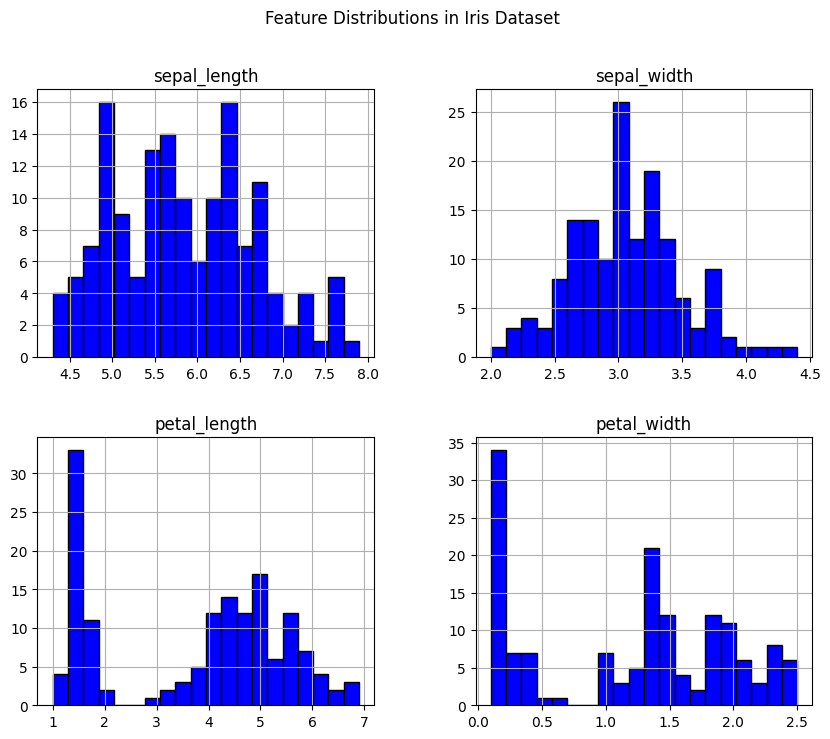

In [4]:
# Histograms for feature distributions
iris_df.hist(bins=20, figsize=(10, 8), color='blue', edgecolor='black')
plt.suptitle("Feature Distributions in Iris Dataset")
plt.show()

**Pairplot for relationships between features**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

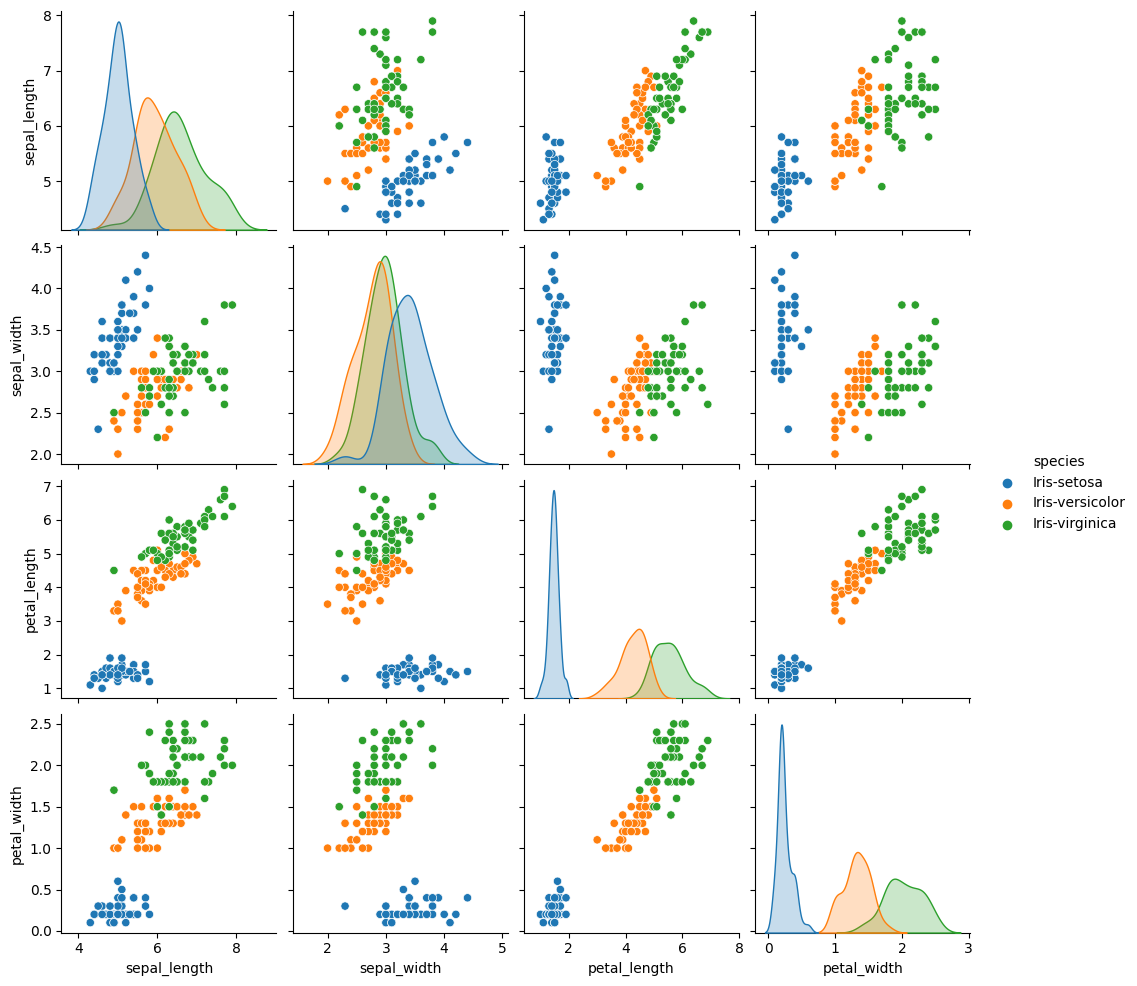

In [5]:
# Pairplot for relationships between features
sns.pairplot(iris_df, hue='species')
plt.show()

# Preprocess the data

**Separate features and target variable**

In [6]:
# Separate features and target variable
X = iris_df.drop('species', axis=1)
y = iris_df['species']

**Standardize the features**

In [7]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Split the data into training and testing sets**

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Apply K-Nearest Neighbors (KNN) clustering algorithm.

**Instantiate and train the KNN model**

In [9]:
# Instantiate and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**Predict on the test data**

In [10]:
# Predict on the test data
y_pred = knn.predict(X_test)

# Evaluate performance using silhouette scores and visualize the clusters.

**Display accuracy**

In [11]:
# Display accuracy
accuracy = knn.score(X_test, y_test)
print(f"KNN Accuracy: {accuracy:.2f}")

KNN Accuracy: 1.00


**Predict clusters**

In [12]:
# Predict clusters (using the KNN model's predictions)
y_pred_labels = knn.predict(X_scaled)

**silhouette score**

In [13]:
# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, y_pred_labels)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.40


**Scatter plot for visualization**

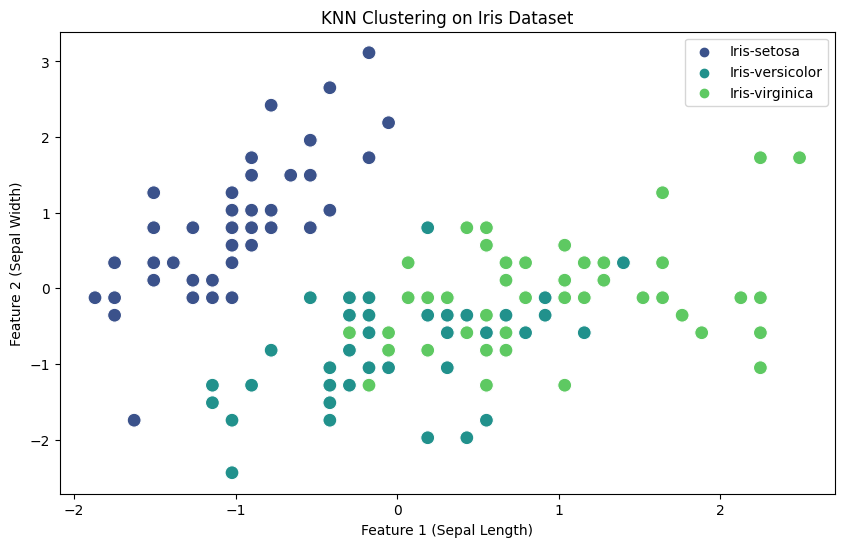

In [14]:
# Scatter plot for visualization (using two features)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_pred_labels, palette='viridis', s=100)
plt.title("KNN Clustering on Iris Dataset")
plt.xlabel('Feature 1 (Sepal Length)')
plt.ylabel('Feature 2 (Sepal Width)')
plt.show()